<a href="https://colab.research.google.com/github/abhay43/Human_Pose_Detection/blob/master/Hello%20vs%20Namaste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/abhay43/Human_Pose_Detection

Cloning into 'Human_Pose_Detection'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 55 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [2]:
def unzipme(location):
  import zipfile
  with zipfile.ZipFile(location) as zip_ref:
    zip_ref.extractall()
    print('done')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
cd '/content/Human_Pose_Detection'

/content/Human_Pose_Detection


In [5]:
unzipme('/content/drive/My Drive/Colab Notebooks/Dataset - Human Pose Estimation')

done


In [6]:
unzipme('/content/Human_Pose_Detection/Action_Dataset.zip')

done


In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, Dense, Dropout, Activation,Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, shutil
from shutil import copy


In [61]:
all_actions = os.listdir('Action_Dataset')
train_parent_dir = '/content/Human_Pose_Detection/Action_Dataset/train'
test_parent_dir = '/content/Human_Pose_Detection/Action_Dataset/test'
train = 'hello'
test = 'namaste'
train_path_hello = os.path.join(train_parent_dir, train)
train_path_namaste  = os.path.join(train_parent_dir, test)
test_path_hello = os.path.join(test_parent_dir, train)
test_path_namaste = os.path.join(test_parent_dir, test)

In [ ]:
os.makedirs(train_path_hello)
os.makedirs(train_path_namaste)
os.makedirs(test_path_hello)
os.makedirs(test_path_namaste)


In [63]:
pwd

'/content/Human_Pose_Detection'

In [65]:
counter = 0

for f in all_actions:
  if(counter >5):
    if(f.find('hello') != -1):
      shutil.copyfile( '/content/Human_Pose_Detection/Action_Dataset/'+str(f), train_path_hello+str('/')+str(f))
    elif(f.find('namaste') != -1):
      shutil.copyfile('/content/Human_Pose_Detection/Action_Dataset/'+str(f) ,train_path_namaste+str('/')+str(f) )
  else:
    if(f.find('hello') != -1):
      shutil.copy('/content/Human_Pose_Detection/Action_Dataset/'+str(f),test_path_hello+str('/')+str(f)  )
    elif(f.find('namaste') != -1):
      shutil.copy('/content/Human_Pose_Detection/Action_Dataset/'+str(f),test_path_namaste+str('/')+str(f)  )
  counter = counter+1

In [67]:

train_data_dir=r"/content/Human_Pose_Detection/Action_Dataset/train"
test_data_dir=r"/content/Human_Pose_Detection/Action_Dataset/test"
epochs= 35
batch_size= 20
img_weight, img_height =250, 250 


In [68]:

#### Data Preprocessing-- 
train_datagen = ImageDataGenerator(zoom_range=0.2,rescale=1./255, horizontal_flip=True,vertical_flip=True, shear_range=0.2 )
test_datagen = ImageDataGenerator(rescale=1./255)

In [69]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_weight, img_height), classes=['hello','namaste'], batch_size=batch_size, class_mode='binary')

Found 19 images belonging to 2 classes.


In [70]:
validation_generator  = train_datagen.flow_from_directory(test_data_dir, target_size=(img_weight, img_height), batch_size=batch_size, class_mode='binary',classes=['hello','namaste'])

Found 10 images belonging to 2 classes.


In [71]:
## We need to set the input_shape for the model as it is used in the CNN
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_weight, img_height)
else:
    input_shape=(img_weight,img_height,3)

In [72]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
callbacks = [earlystop]
model_3 = Sequential()
model_3.add(Conv2D(32,(3,3), input_shape = input_shape))
#model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64,(3,3), activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128,(3,3), activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
#model_3.add(BatchNormalization())
model_3.add(Dropout(0.25))
model_3.add(Dense(1, activation='sigmoid'))

In [73]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_3.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 59, 59, 128)      

In [74]:
training = model_3.fit_generator(train_generator,
                   epochs=epochs,
                   validation_data=validation_generator,
                       )

Epoch 1/35
1/1 [==============================] - 0s 485ms/step - loss: 0.6953 - accuracy: 0.4737 - val_loss: 0.9150 - val_accuracy: 0.4000
Epoch 2/35
1/1 [==============================] - 0s 256ms/step - loss: 1.7156 - accuracy: 0.6316 - val_loss: 17.4231 - val_accuracy: 0.5000
Epoch 3/35
1/1 [==============================] - 0s 257ms/step - loss: 42.6528 - accuracy: 0.4737 - val_loss: 6.3572 - val_accuracy: 0.5000
Epoch 4/35
1/1 [==============================] - 0s 267ms/step - loss: 15.6074 - accuracy: 0.4737 - val_loss: 0.8259 - val_accuracy: 0.5000
Epoch 5/35
1/1 [==============================] - 0s 258ms/step - loss: 1.6707 - accuracy: 0.4211 - val_loss: 1.4021 - val_accuracy: 0.5000
Epoch 6/35
1/1 [==============================] - 0s 272ms/step - loss: 3.4240 - accuracy: 0.5263 - val_loss: 0.9697 - val_accuracy: 0.5000
Epoch 7/35
1/1 [==============================] - 0s 270ms/step - loss: 2.0313 - accuracy: 0.5263 - val_loss: 0.7191 - val_accuracy: 0.5000
Epoch 8/35
1/1 [=

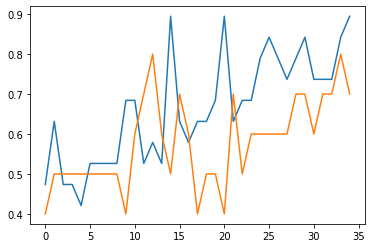

In [75]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])

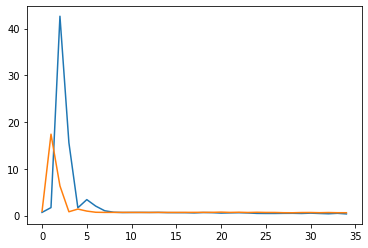

In [76]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

[[1.]]
Prediction:  namaste


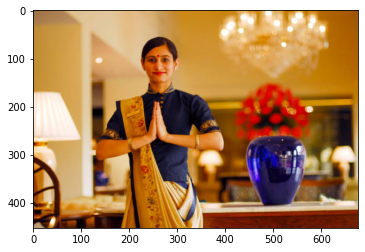

In [77]:
import numpy as np
img_pred = image.load_img("//content/drive/My Drive/Colab Notebooks/15988569484945336087126641032638.jpg",target_size=(250,250))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="namaste"
else:
    prediction ="hello"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/My Drive/Colab Notebooks/15988569484945336087126641032638.jpg')
imgplot = plt.imshow(img)
plt.show()

[[1.]]
Prediction:  namaste


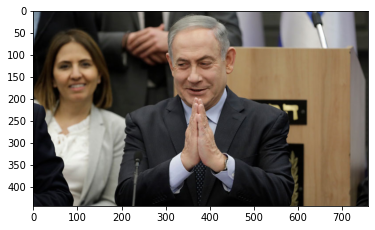

In [78]:
import numpy as np
img_pred = image.load_img("/content/drive/My Drive/Colab Notebooks/netanyahu-namaste-ap.jpg",target_size=(250,250))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="namaste"
else:
    prediction ="hello"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/My Drive/Colab Notebooks/netanyahu-namaste-ap.jpg')
imgplot = plt.imshow(img)
plt.show()

0.0
Prediction:  hello


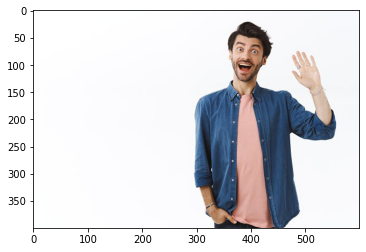

In [79]:
import numpy as np
img_pred = image.load_img("/content/drive/My Drive/Colab Notebooks/hi.jpg",target_size=(250,250))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model_3.predict(img_pred)
print(rslt[0][0])
if rslt[0][0]==1:
    prediction ="namaste"
else:
    prediction ="hello"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/My Drive/Colab Notebooks/hi.jpg')
imgplot = plt.imshow(img)
plt.show()